#Wine Quality

**Data Set Information:**
TBC

**Attribute Information:**

**-type:** red wine or white wine, nominal qunatity; <br>
**-fixed acidity:** grams of tataric acid per 100ml, ratio qunatity; <br>
**-volatile acidity:** grams of acetic acid per liter of wine, ratio qunatity; <br>
**-citric acid:** grams per liter, ratio qunatity; <br>
**-residual sugar:** grams per liter, ratio qunatity; <br>
**-chlorides:** grams of sodium chloride per liter, ratio qunatity; <br>
**-free sulfur dioxide:** milligrams per liter, ratio qunatity; <br>
**-total sulfur dioxide:** milligrams per liter, ratio qunatity; <br>
**-density:** grams per cubic centimeter, ratio qunatity; <br>
**-pH:** ratio qunatity; <br>
**-sulphates:** grams of potassium sulfate per liter, ratio qunatity; <br>
**-alcohol:** vol.%, ratio qunatity; <br>
**-quality:** Output variable, score between 0 and 10, subjective(?), ordinal qunantity 

Preprocessing:
Combine two .csv files (one for red wine, one for white wine) into one file with the new attribute "type".





# General Data Preparation
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import SelectPercentile, chi2, SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Get the Data

In [2]:
data = pd.read_csv('wineQualityBothTypes.csv', delimiter = ';')

In [3]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Basic Data Information 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
data.describe(include = 'object')

,type
count,6497
unique,2
top,white
freq,4898


Check missing values

In [7]:
print(data.isnull().sum(axis=0))

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Exploratory Data Analysis

### Quality

In [8]:
#split data into red and white again
dataRed = data.loc[data['type'] == 'red']
dataWhite = data.loc[data['type'] == 'white']

#### Histograms

Text(0.5, 0, 'quality')

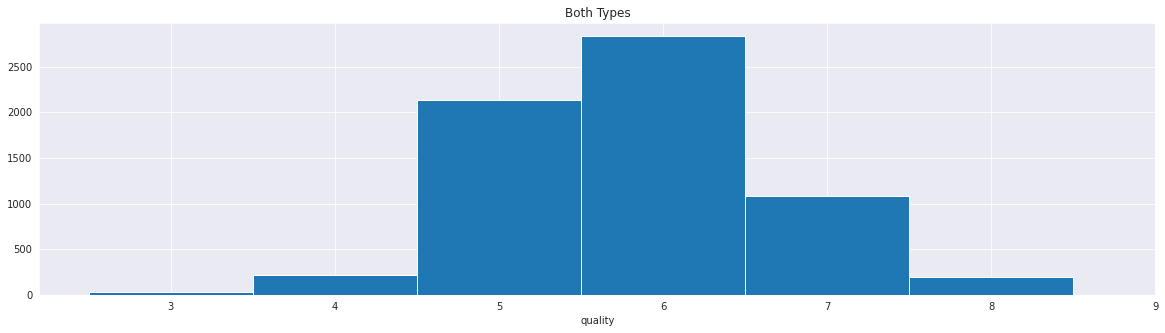

In [9]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(data['quality'].min(), data['quality'].max()+1)
plt.hist(data['quality'], bins=bins, align='left')
plt.title("Both Types")
plt.xticks(bins)
plt.xlabel('quality')

#### Split into white wine and red wine
White wine:

Text(0.5, 0, 'quality')

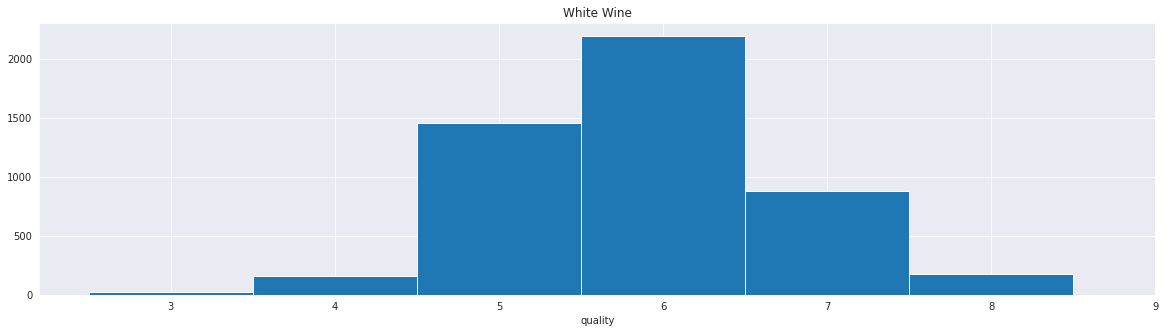

In [10]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
dataWhite = data.loc[data['type'] == 'white']
bins = np.arange(dataWhite['quality'].min(), dataWhite['quality'].max()+1)
plt.hist(dataWhite['quality'], bins=bins, align='left')
plt.title("White Wine")
plt.xticks(bins)
plt.xlabel('quality')

Red wine:

Text(0.5, 0, 'quality')

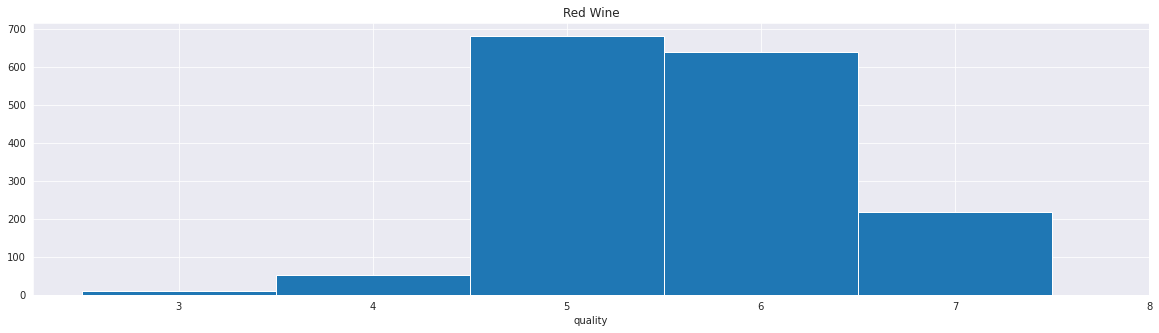

In [11]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(dataRed['quality'].min(), dataRed['quality'].max()+1)
plt.hist(dataRed['quality'], bins=bins, align='left')
plt.title("Red Wine")
plt.xticks(bins)
plt.xlabel('quality')

### Fixed Acidity vs. Quality 

#### Both types

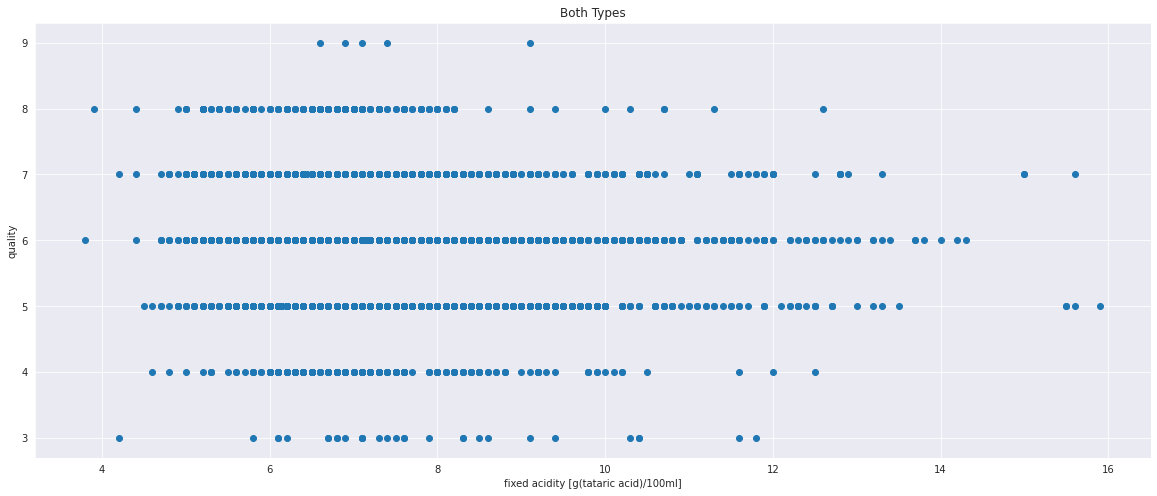

In [12]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['fixed acidity'], data['quality'])
plt.title("Both Types")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### Red Wine

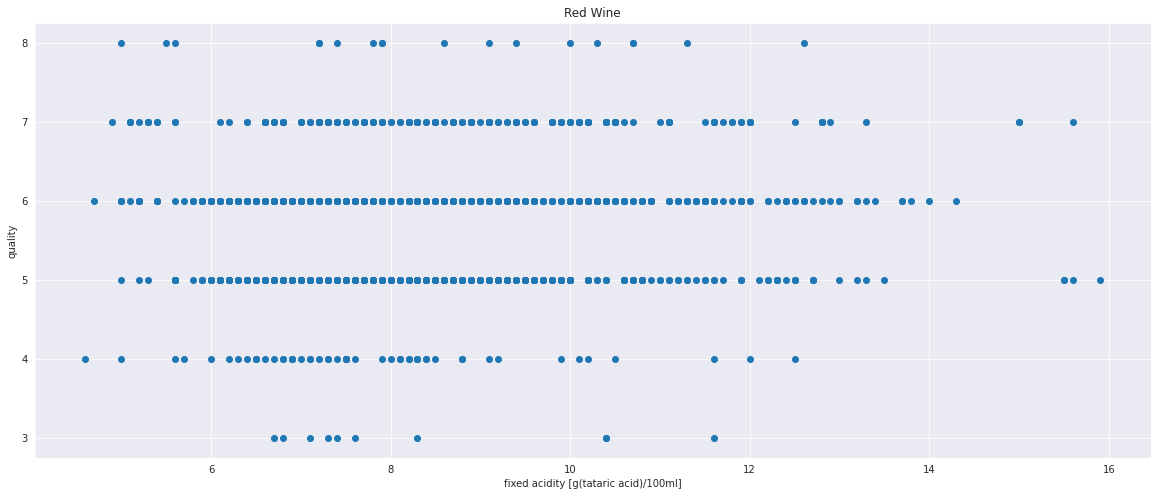

In [13]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['fixed acidity'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### White Wine

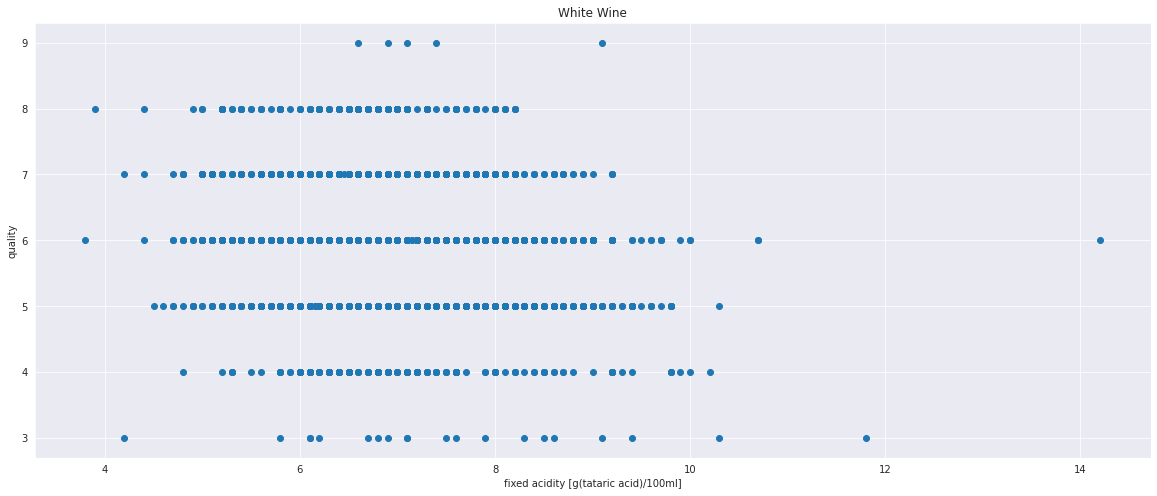

In [14]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['fixed acidity'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

### Volatile Acidity vs. Quality 

#### Both types

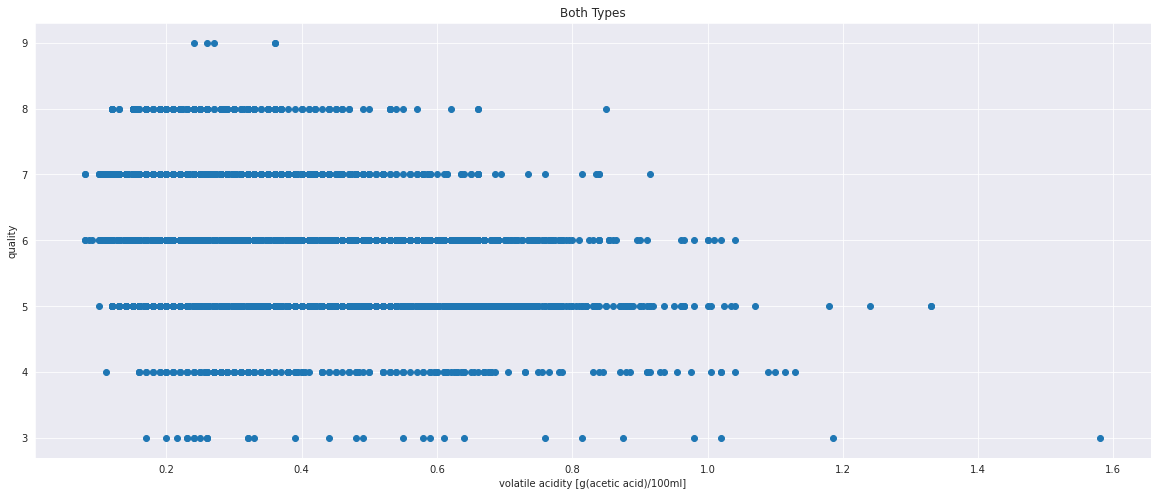

In [15]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['volatile acidity'], data['quality'])
plt.title("Both Types")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### Red Wine

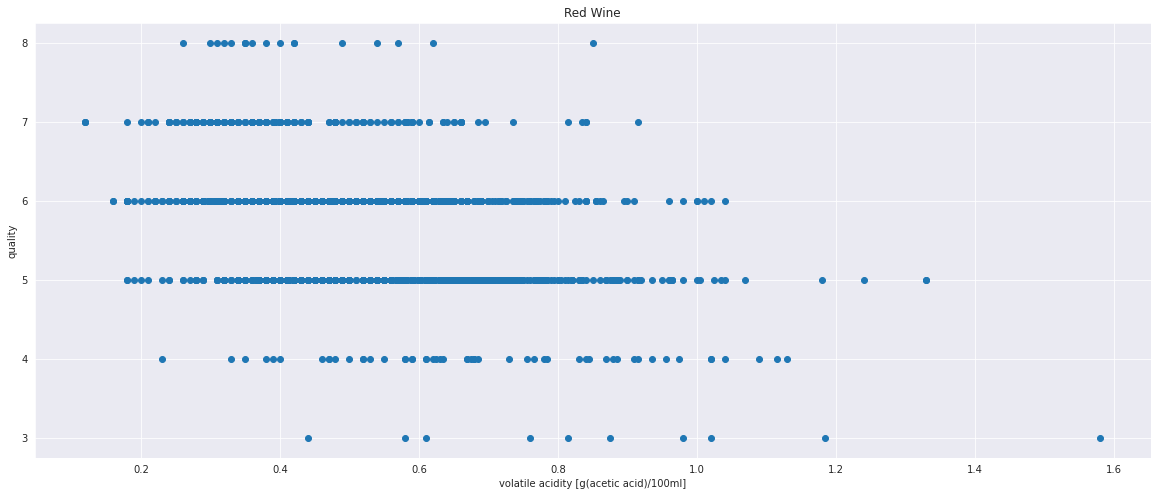

In [16]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['volatile acidity'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### White Wine

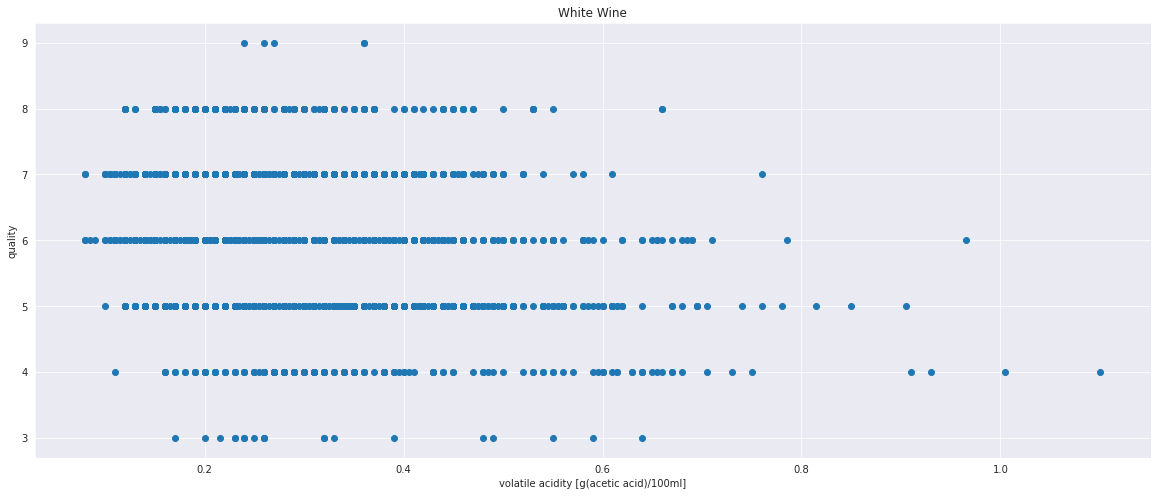

In [17]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['volatile acidity'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

### Citric Acid vs. Quality 

#### Both types

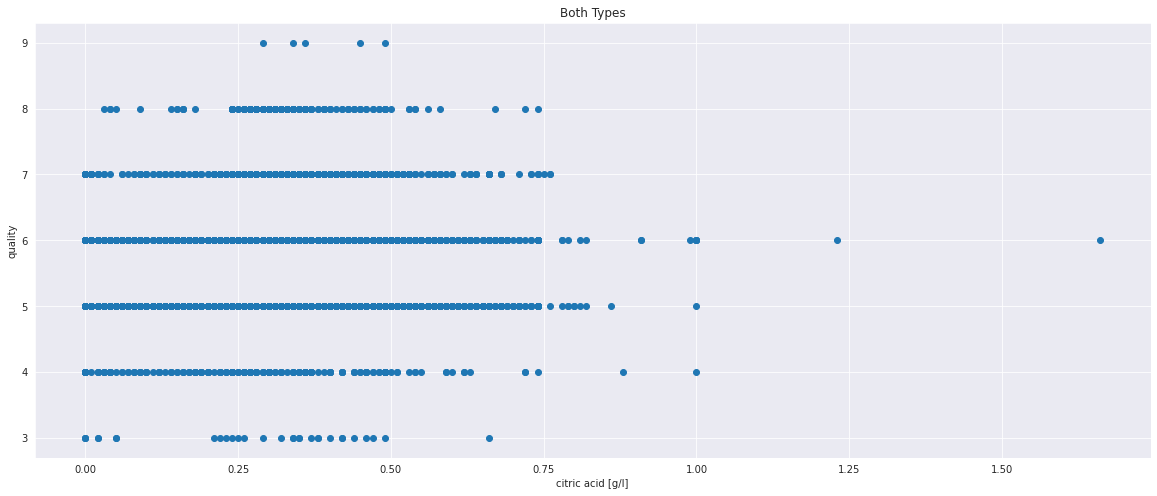

In [18]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['citric acid'], data['quality'])
plt.title("Both Types")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

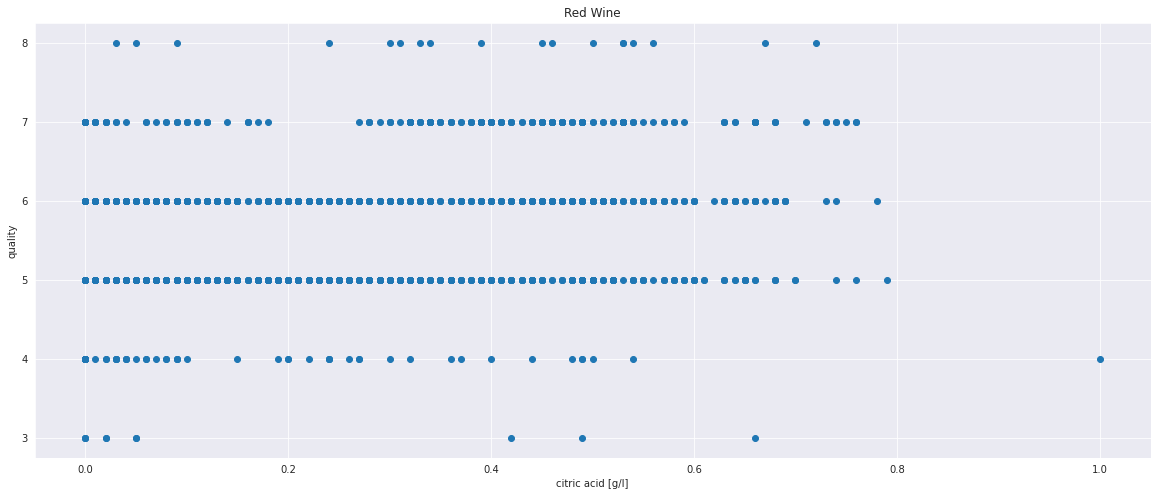

In [19]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['citric acid'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

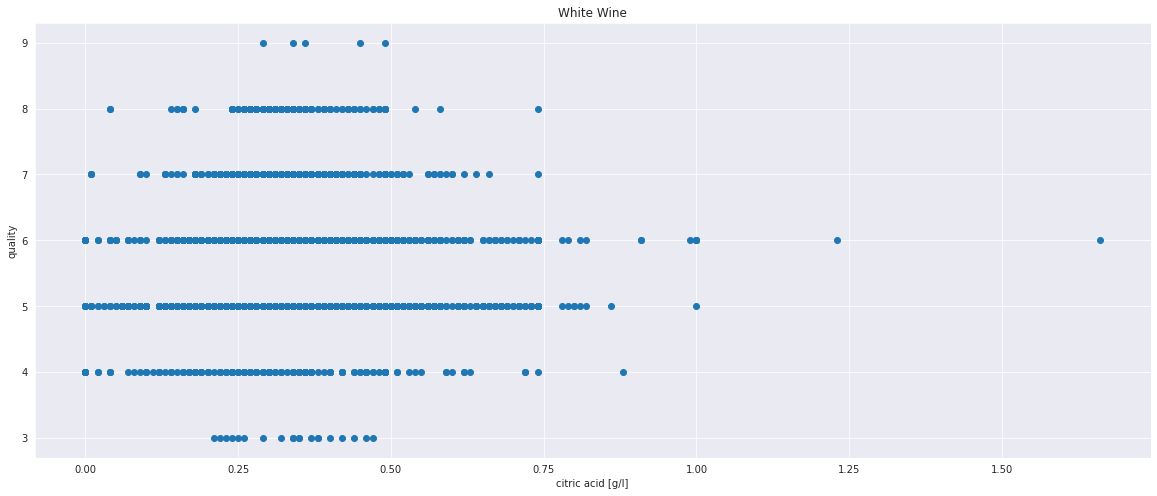

In [20]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['citric acid'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

### Residual Sugar vs. Quality 

#### Both types

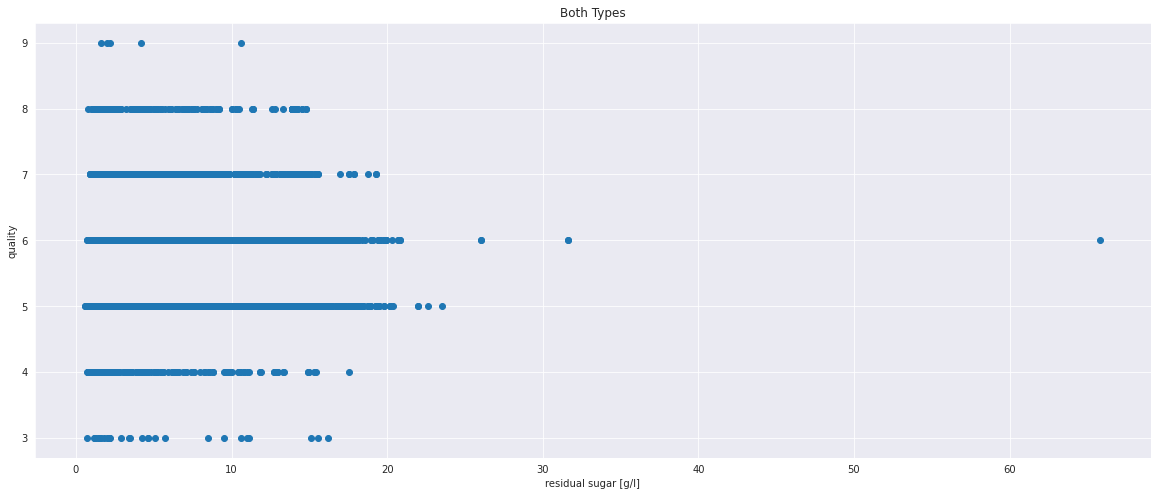

In [21]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['residual sugar'], data['quality'])
plt.title("Both Types")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

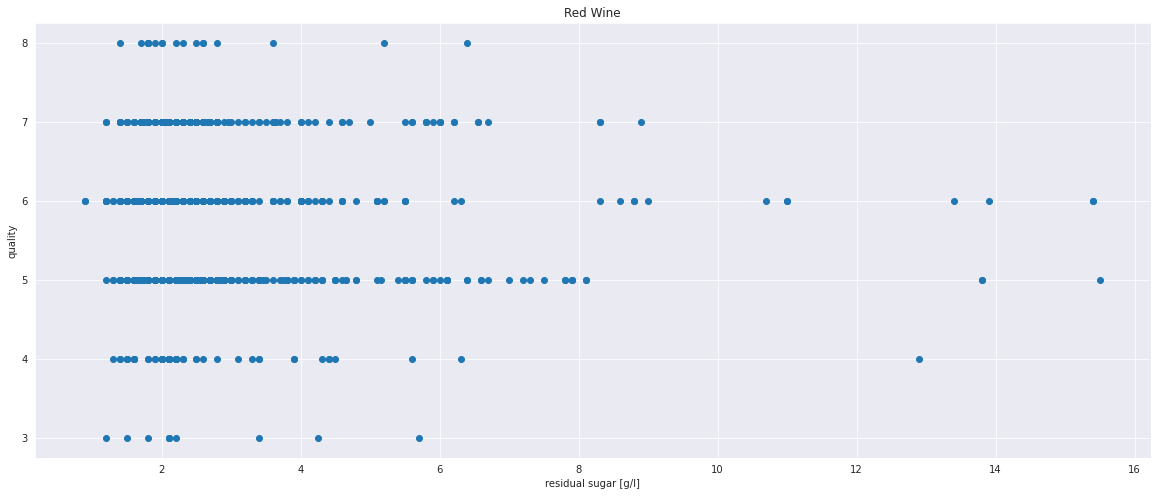

In [22]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['residual sugar'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

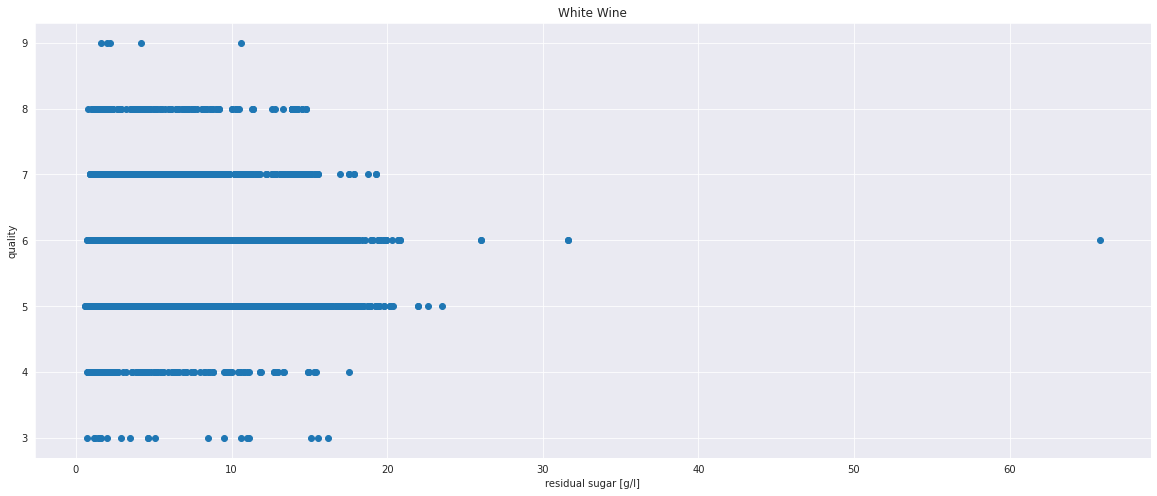

In [23]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['residual sugar'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

### Chlorides vs. Quality 

#### Both types

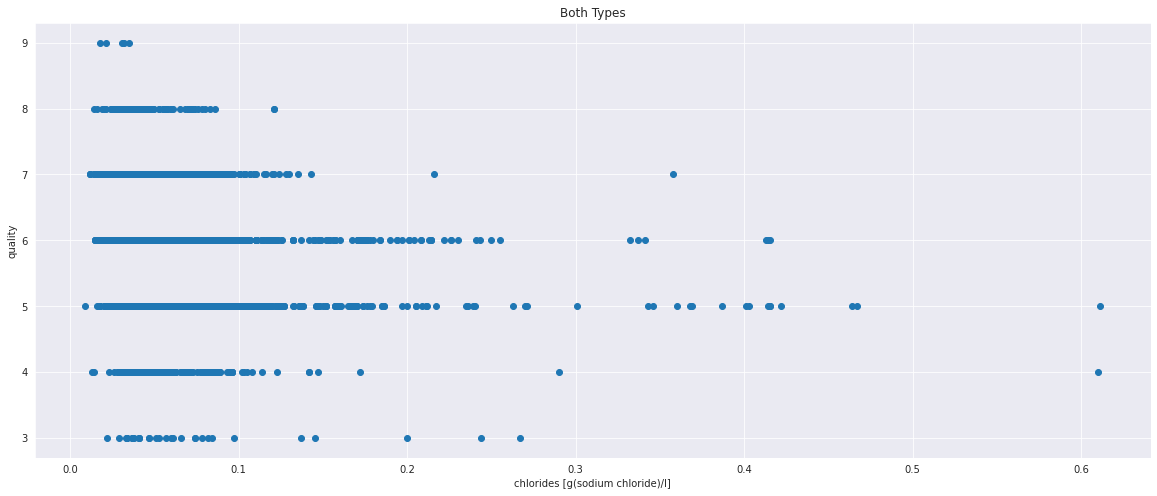

In [24]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['chlorides'], data['quality'])
plt.title("Both Types")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

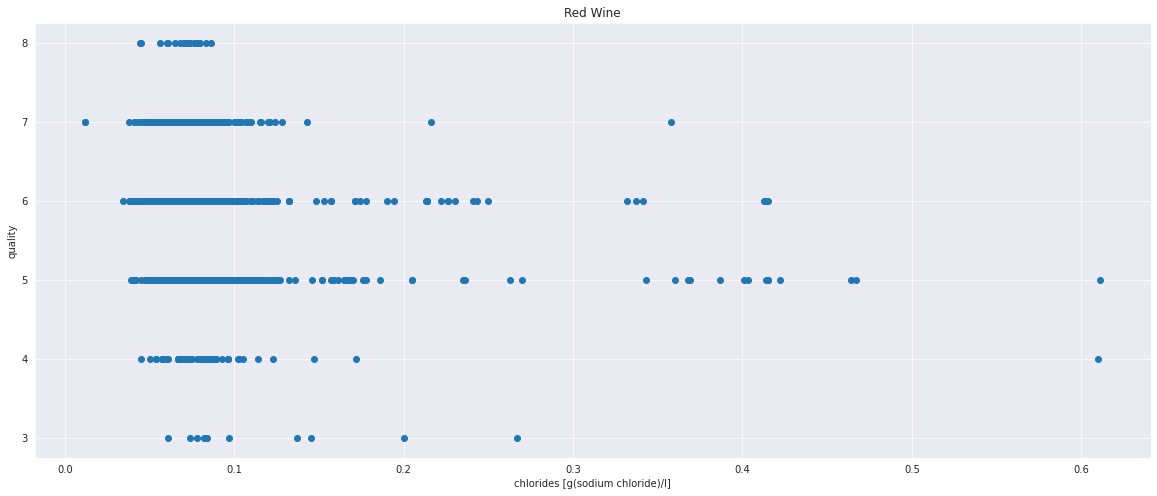

In [25]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['chlorides'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

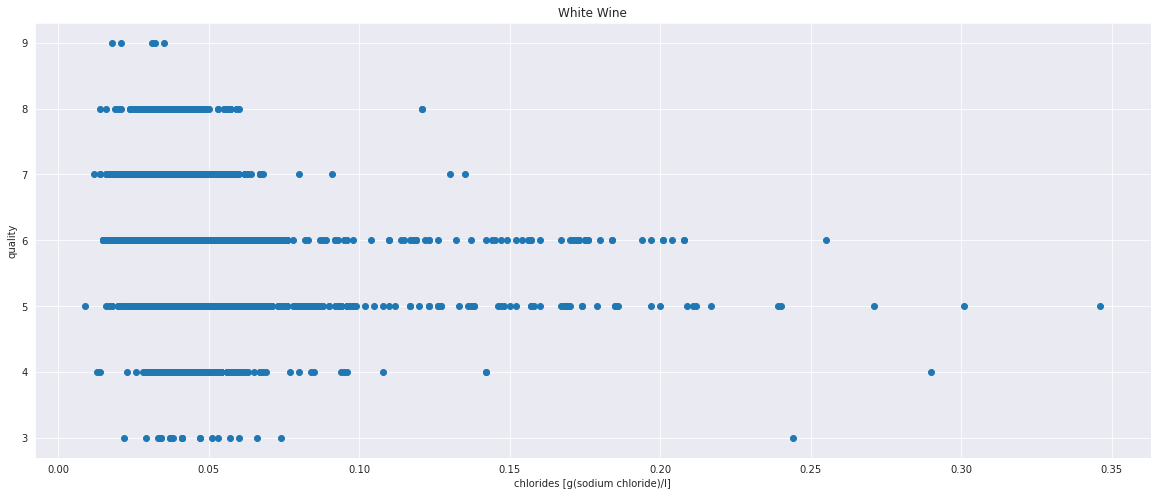

In [26]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['chlorides'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

### Free Sulfur Dioxide vs. Quality 

#### Both types

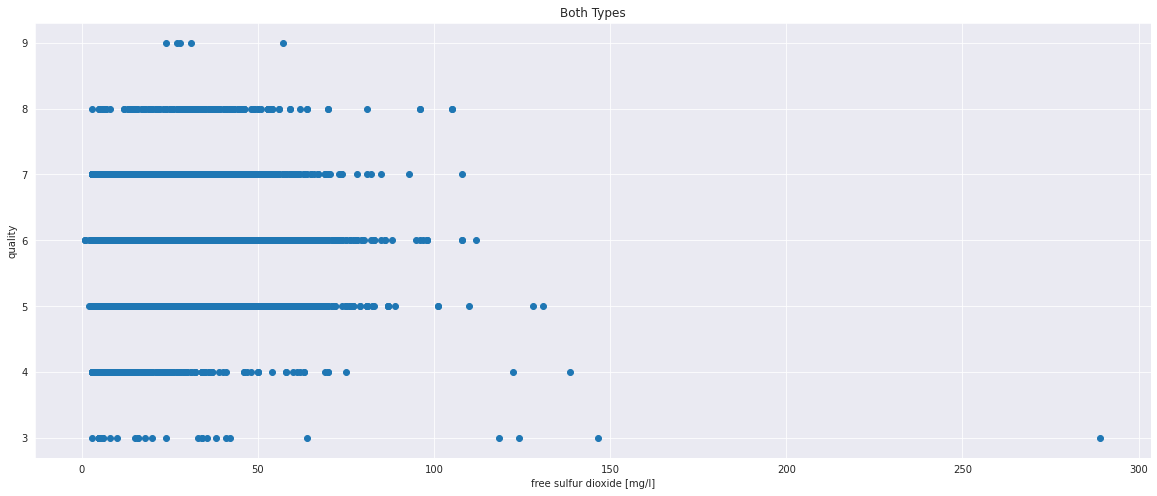

In [27]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['free sulfur dioxide'], data['quality'])
plt.title("Both Types")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

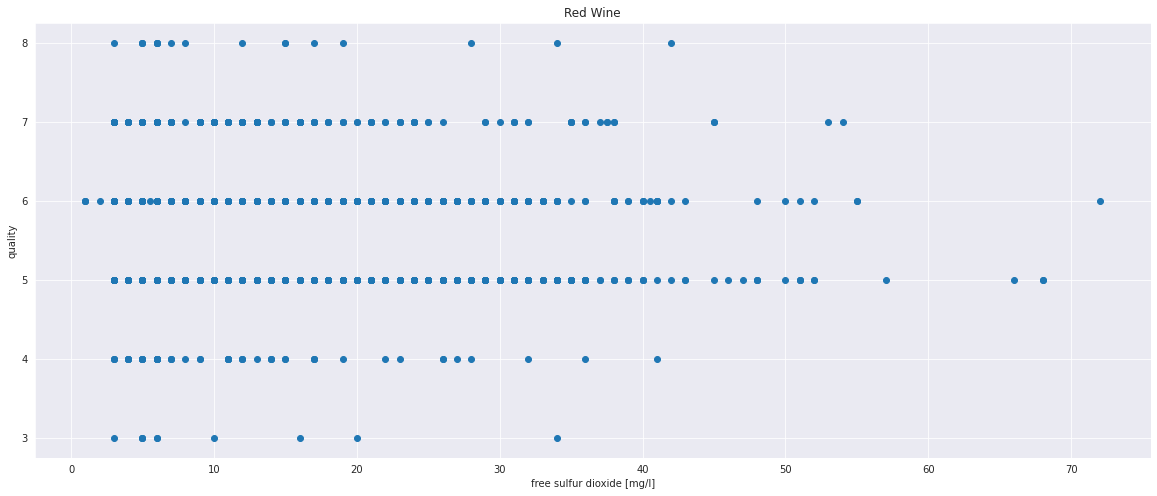

In [28]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['free sulfur dioxide'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

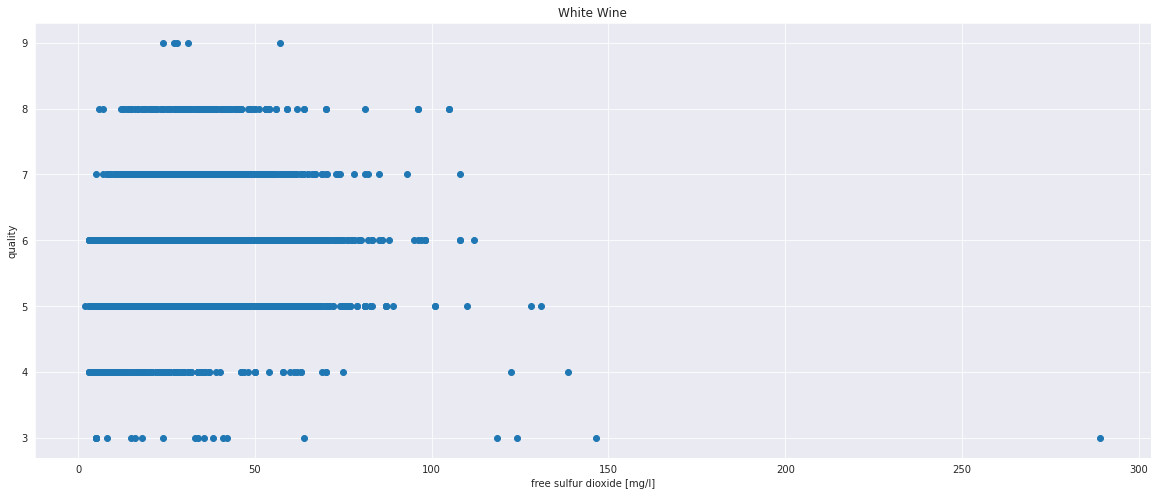

In [29]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['free sulfur dioxide'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

### Total Sulfur Dioxide vs. Quality 

#### Both types

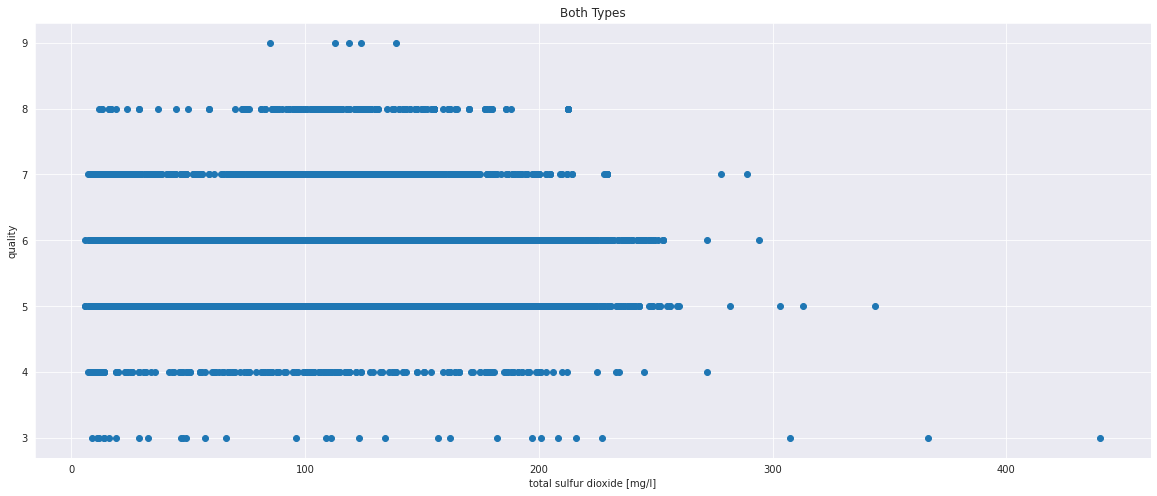

In [30]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['total sulfur dioxide'], data['quality'])
plt.title("Both Types")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

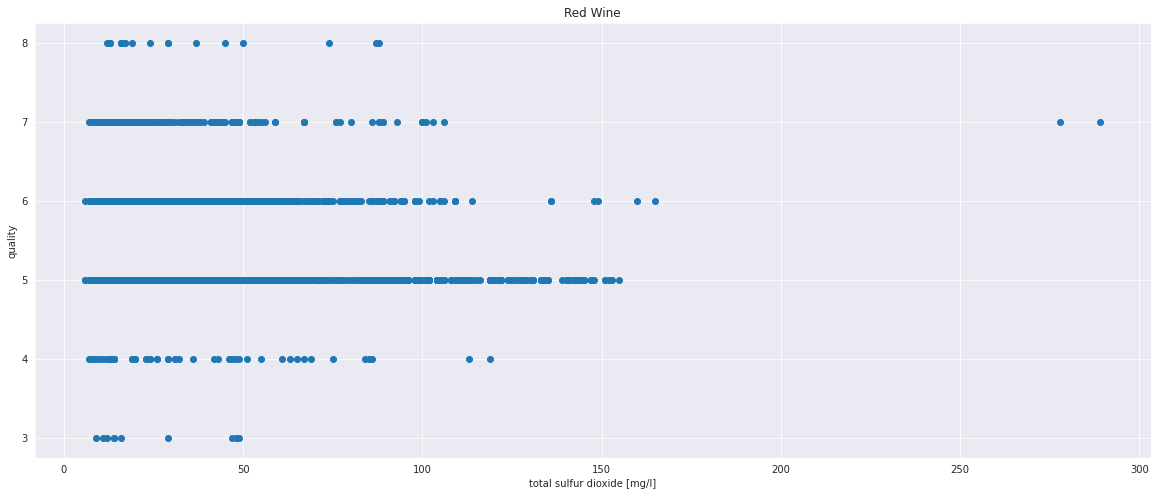

In [31]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['total sulfur dioxide'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

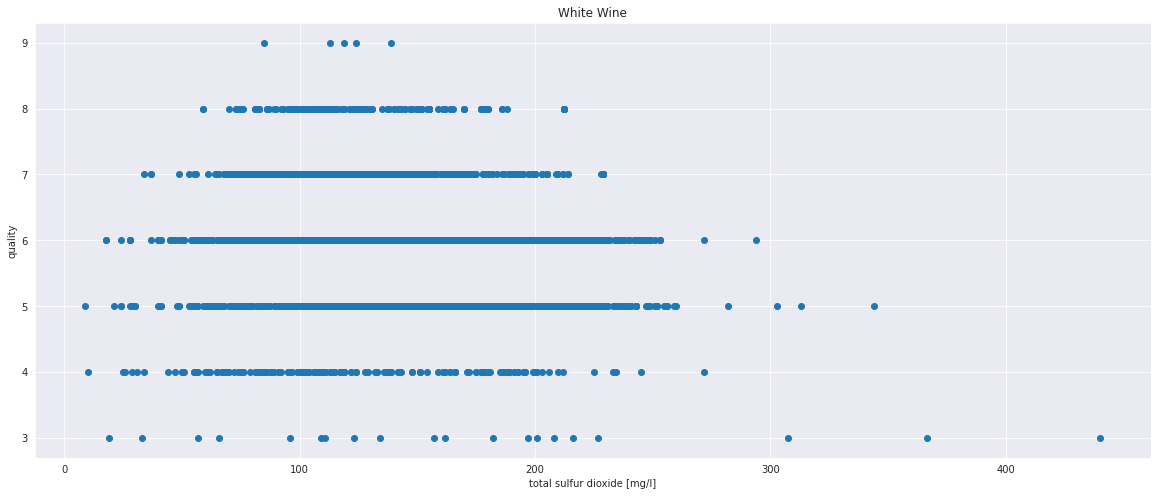

In [32]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['total sulfur dioxide'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

### Density vs. Quality 

#### Both types

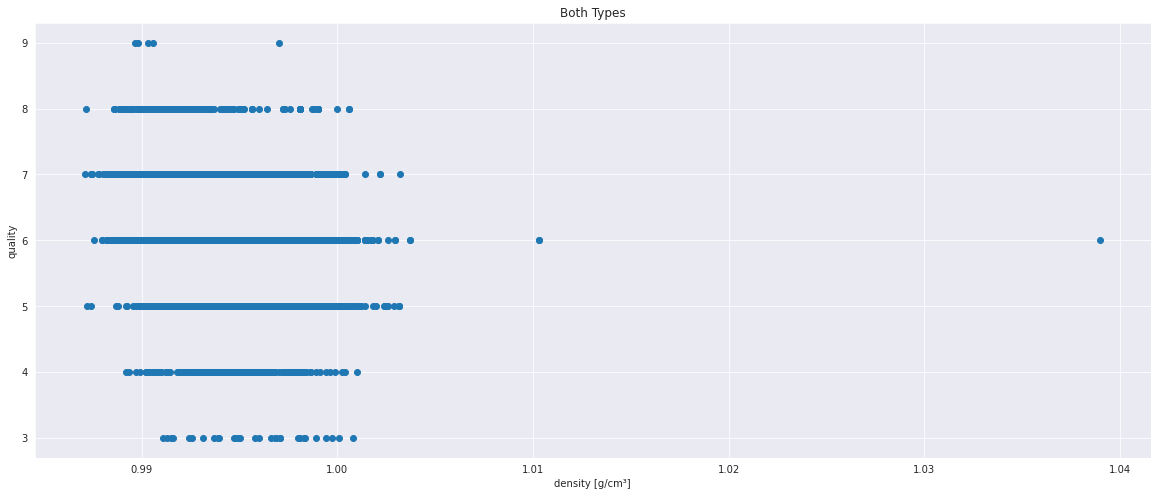

In [33]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['density'], data['quality'])
plt.title("Both Types")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

#### Red Wine

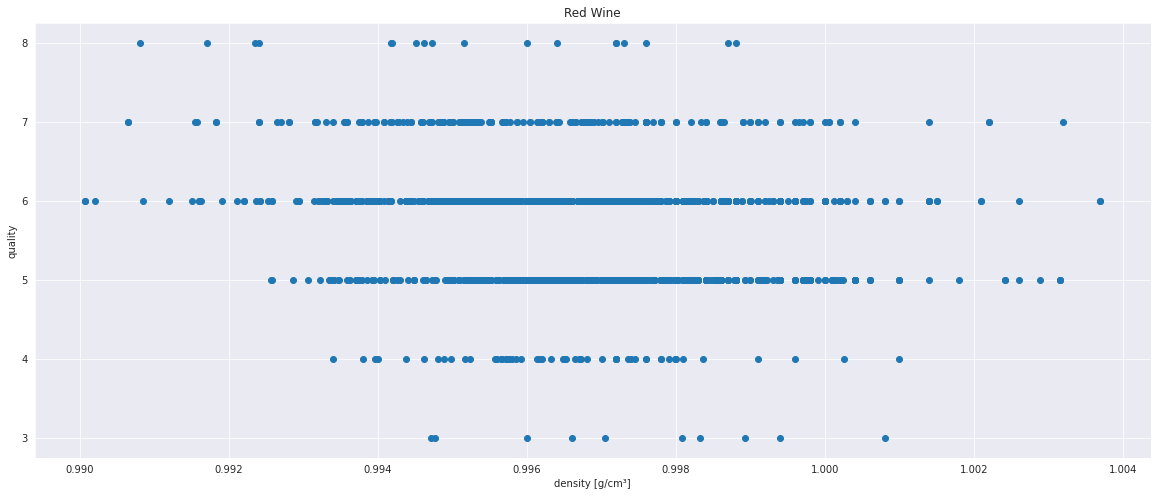

In [34]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['density'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

#### White Wine

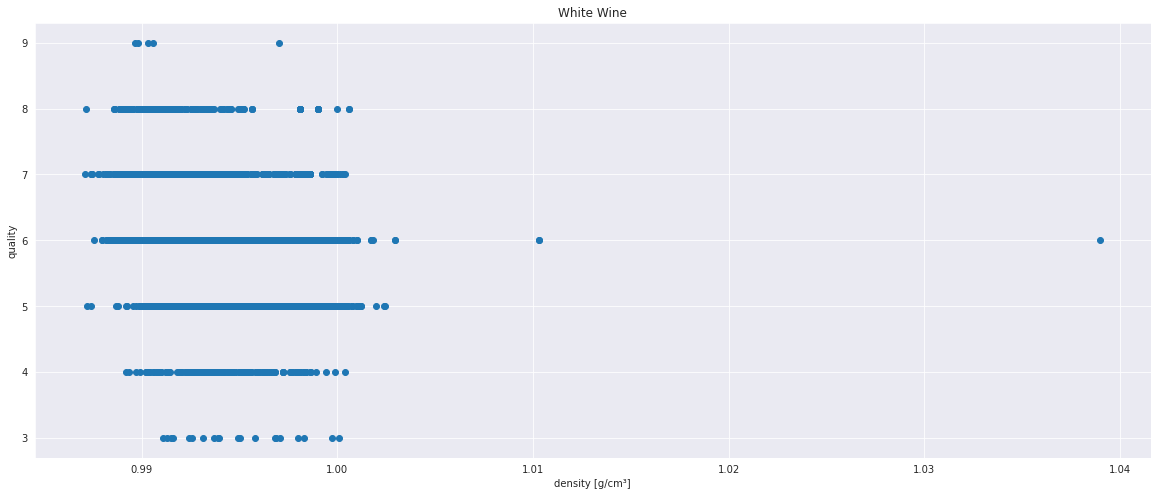

In [35]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['density'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

### pH value vs. Quality 

#### Both types

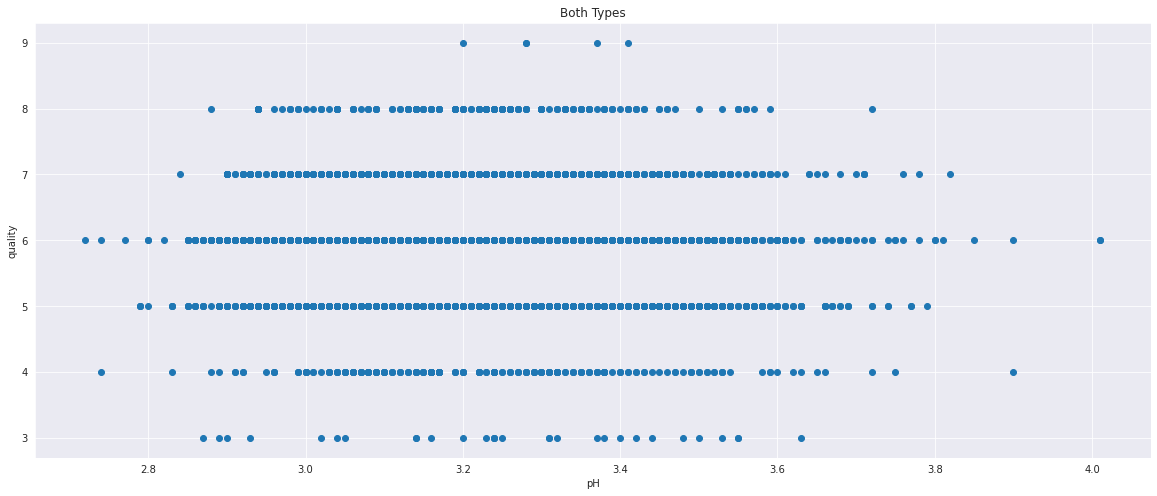

In [36]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['pH'], data['quality'])
plt.title("Both Types")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

#### Red Wine

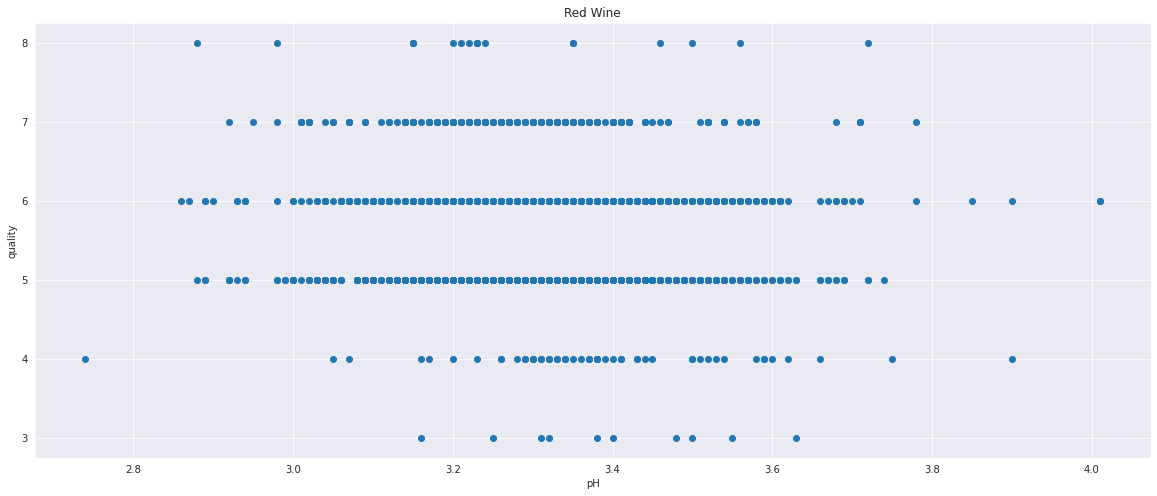

In [37]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['pH'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

#### White Wine

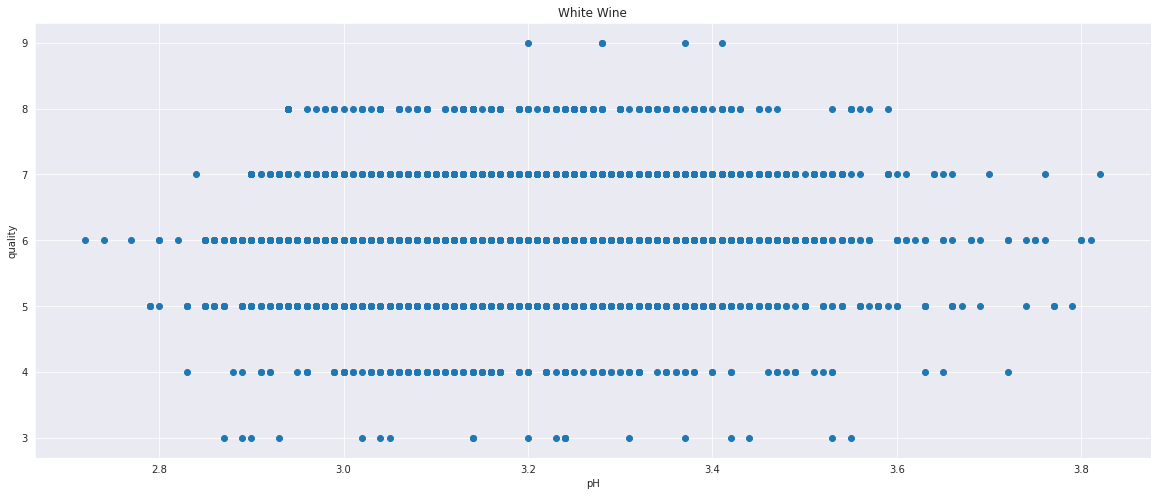

In [38]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['pH'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

### Sulphates vs. Quality 

#### Both types

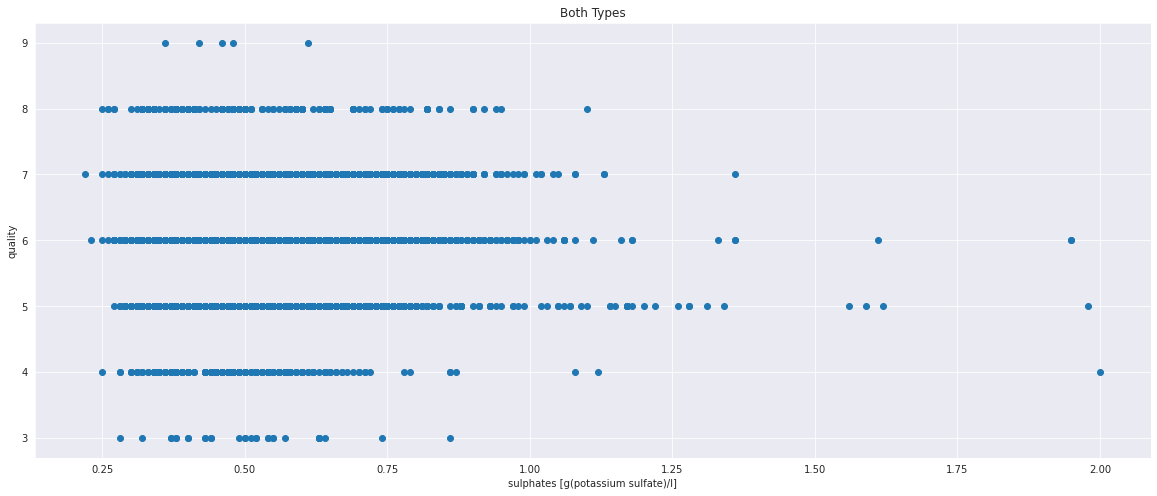

In [39]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['sulphates'], data['quality'])
plt.title("Both Types")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

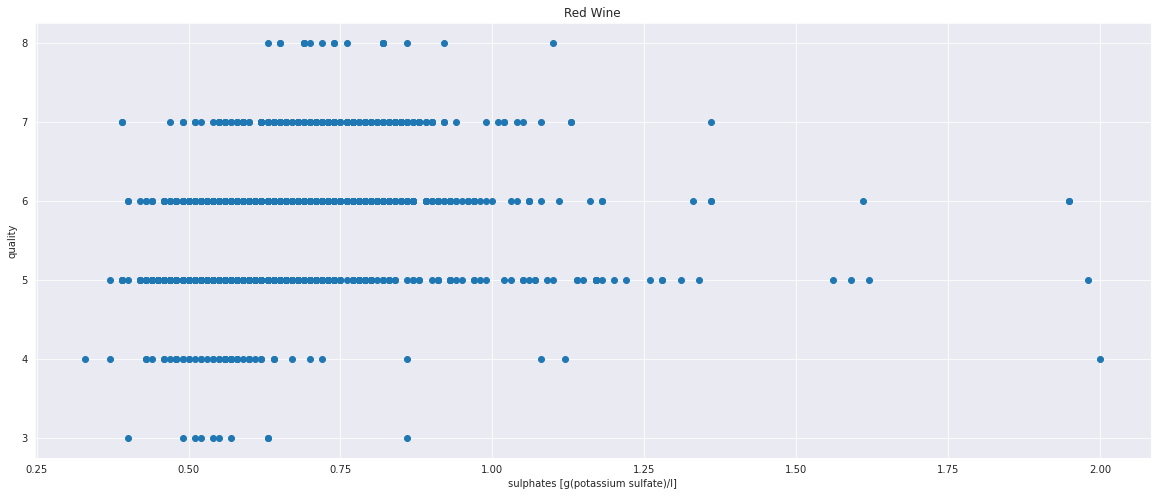

In [40]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['sulphates'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

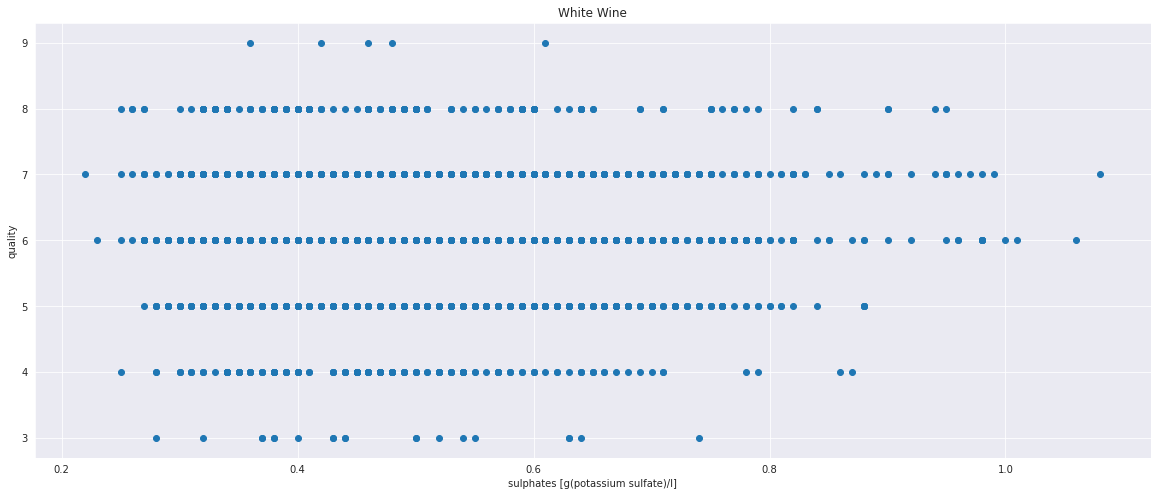

In [41]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['sulphates'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

### Alcohol Content vs. Quality 

#### Both types

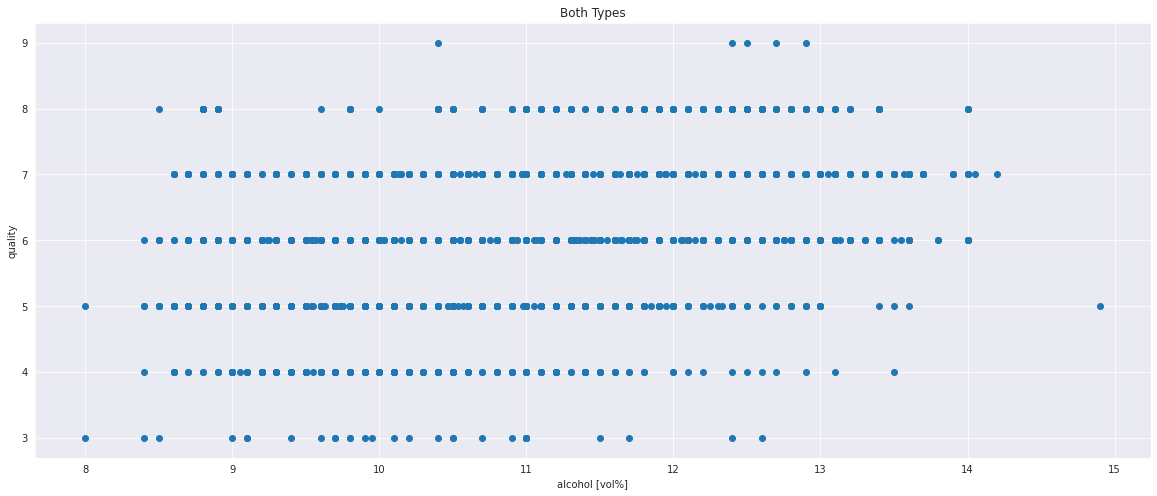

In [42]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['alcohol'], data['quality'])
plt.title("Both Types")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

#### Red Wine

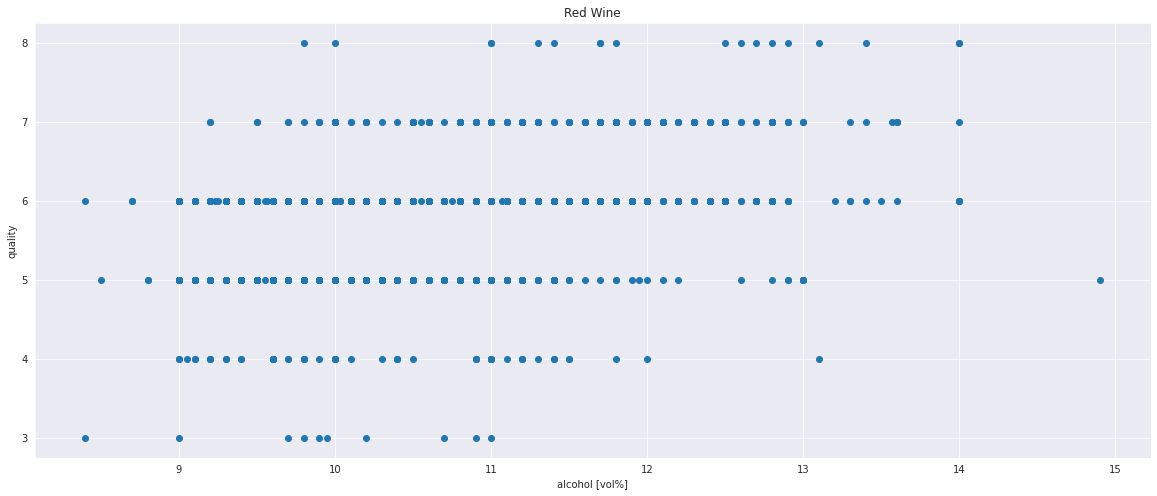

In [43]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['alcohol'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

#### White Wine

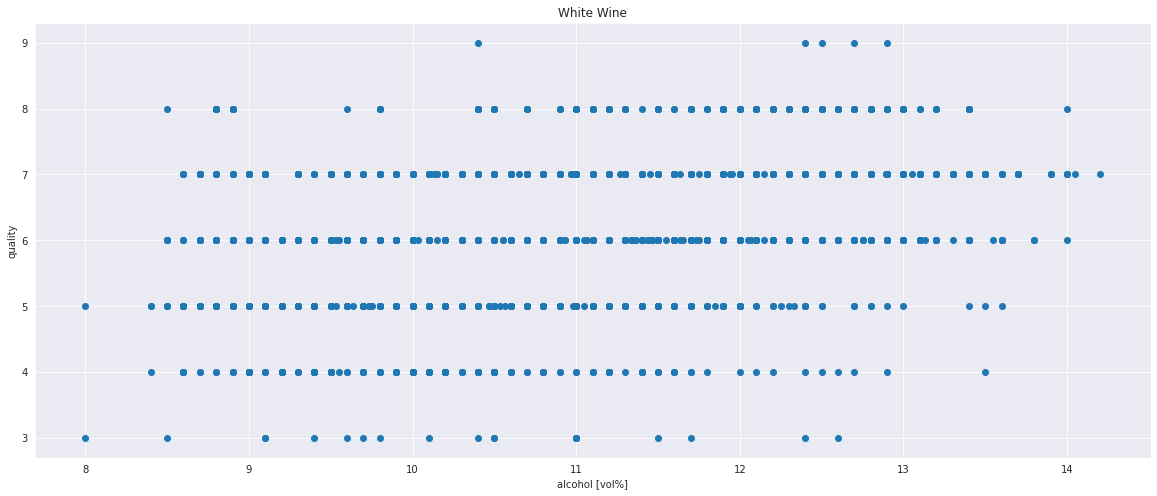

In [44]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['alcohol'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

# Learning Algorithms
## Preprocessing

In [45]:
#first convert the strings 'white' and 'red' to 0 and 1 respectively
mapping = {'white': 0, 'red': 1}
data = data.replace({'type': mapping})

#Then split data into red and white again with that mapping
dataWhite = dataWhite.replace({'type': mapping})
dataRed = dataRed.replace({'type': mapping})

#split the data in attributes and class
X = data.drop('quality', axis=1)
y = data['quality']

#split the data in attributes and class
XWhite = dataWhite.drop('quality', axis=1)
yWhite = dataWhite['quality']

XRed = dataRed.drop('quality', axis=1)
yRed = dataRed['quality']


###  1) Feature Selection 

**Choose one of the methods:**
1. SelectPercentile (chi2)
2. SelectFromModel (LinearSVC)
3. SelectFromModel (LogisticRegression)
3. SelectFromModel (ExtraTreesClassifier)

### 2) Data Pre-processing

**Choose one of the methods:**
1. Standardization (StandardScaler)
2. Standardization (RobustScaler)
3. MinMaxScaler
4. Normalization

### 3)Outliers Detection using mathematical function Z-Score

In [46]:
featureselection_method = 4
preprocessing_method = 1

In [47]:
for i in range(0,3):
    
    if i == 0:
        print("\n-------------------both types ------------------\n")
        XCurr = X
        yCurr = y
    elif i == 1:
        print("\n--------------------red wine -------------------\n")
        XCurr = XRed
        yCurr = yRed
    elif i == 2:
        print("\n-------------------white wine------------------\n")
        XCurr = XWhite
        yCurr = yWhite

        
    #Feature Selection:
    if featureselection_method == 1:
        selection = SelectPercentile(chi2, percentile=5)
    elif featureselection_method == 2:
        clf = LinearSVC()
        #clf = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
        selection = SelectFromModel(clf, prefit=False)
    elif featureselection_method == 3:
        clf = LogisticRegression()
        #clf = LogisticRegression(C=0.2, penalty="l2", dual=False, max_iter=200).fit(X, y)
        selection = SelectFromModel(clf, prefit=False)
    elif featureselection_method == 4:
        clf = ExtraTreesClassifier(n_estimators=50).fit(XCurr, yCurr)
        selection = SelectFromModel(clf, prefit=False)      

    clf.feature_importances_ 
    X_transformed = selection.fit_transform(XCurr, yCurr)
    columns = np.asarray(XCurr.columns.values)
    support = np.asarray(selection.get_support())
    columns_with_support = columns[support]
    print("X_transformed.shape",X_transformed.shape)

    
    #Data Pre-processing:
    if preprocessing_method == 1:
        scaler = StandardScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 2:
        scaler = RobustScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 3:
        scaler = preprocessing.MinMaxScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 4:
        scaler = preprocessing.Normalizer()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    print("X_scaled = ",X_scaled)
    
    
    #Outlier Detection:
    z = np.abs(stats.zscore(X_scaled))
    threshold = 20
    outliers_rows = np.where(z > threshold)
    print("\n z > threshold = ", np.where(z > threshold))
    # The first array contains the list of row numbers and second array respective column numbers
    print("\n number of outliers = ",len(set(outliers_rows[0])))
    
    #Remove Ouliers
    #X_prepared = X_scaled[(np.abs(stats.zscore(X_scaled)) < threshold).all(axis=1)]
    #X_prepared.shape
    #y = y.to_numpy()
    
    if i == 0:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    elif i == 1:
        XRed_train, XRed_test, yRed_train, yRed_test = train_test_split(X_scaled, yRed, test_size=0.30)
    elif i == 2:
        XWhite_train, XWhite_test, yWhite_train, yWhite_test = train_test_split(X_scaled, yWhite, test_size=0.30)


-------------------both types ------------------

X_transformed.shape (6497, 7)
X_scaled =  [[ 2.18883292 -0.7447781  -1.10013986 ...  1.03499282  0.19309677
  -0.91546416]
 [ 3.28223494 -0.59764007 -0.31132009 ...  0.70148631  0.99957862
  -0.58006813]
 [ 2.55330026 -0.66069923 -0.87476278 ...  0.76818761  0.79795816
  -0.58006813]
 ...
 [-0.6054167  -0.89191614 -0.02959874 ... -0.71925142 -0.47897144
  -0.91546416]
 [-0.30169391 -0.91293585 -0.59304143 ... -2.00325148 -1.016626
   1.9354021 ]
 [-0.78765037 -0.97599501 -0.48035289 ... -1.7631268  -1.41986693
   1.09691202]]

 z > threshold =  (array([], dtype=int64), array([], dtype=int64))

 number of outliers =  0

--------------------red wine -------------------

X_transformed.shape (1599, 5)
X_scaled =  [[ 0.96187667 -0.37913269  0.55827446 -0.57920652 -0.96024611]
 [ 1.96744245  0.62436323  0.02826077  0.1289504  -0.58477711]
 [ 1.29706527  0.22904665  0.13426351 -0.04808883 -0.58477711]
 ...
 [-0.09955388 -0.19667889 -0.5335537

## Models Prediction

**Types:**
- Linear Classifiers: Logistic Regression, Naive Bayes Classifier
- Nearest Neighbor
- Support Vector Machines
- Decision Trees
- Random Forest
- Neural Networks

In [48]:
NN = 1

d = {}

d["Logistic Regression"] = LogisticRegression(max_iter=200)
d["Gaussian Naive Bayes"] = GaussianNB()

d["KNearest Neighbors ("+ str(NN) + ")"] = KNeighborsClassifier(n_neighbors=NN)

d["SVM rbf"] = SVC()
d["SGD Classifier"] = SGDClassifier()

d["Decision Tree"] = DecisionTreeClassifier()

d["Random Forest"] = RandomForestClassifier()

d["Multi-layer Perceptron Classifier"] = MLPClassifier(max_iter=1000)

### Both Wine-Types Combined

In [49]:
scoreList = []
nameList = []

for name, clf in d.items():
    start = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreList.append(accuracy_score(y_test, y_pred))
    nameList.append(name)

    end = time.time()
    print("\n--------------",name,"---------------\n")
    print("- Accuracy: %0.3f" % score, "- Time: %0.2f" % (end - start), "seconds")
    print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (X_test.shape[0], (y_test != y_pred).sum()))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

print("###############")
ranking = sorted(zip(scoreList,nameList))[::-1]
#print(sorted(zip(scoreList,nameList)))
print("\nClassifiers from best to worst:")
for i in range(0, len(ranking)):
    print(i+1, ') {0:35} score: {1}'.format(ranking[i][1], ranking[i][0]))



-------------- Logistic Regression ---------------

- Accuracy: 0.546 - Time: 0.46 seconds

 Number of mislabeled points out of a total 1950 points : 886 


[[  0   0   1   3   0   0   0]
 [  0   0  33  29   1   0   0]
 [  0   0 384 246   6   0   0]
 [  0   0 194 625  47   0   0]
 [  0   0  16 252  55   0   0]
 [  0   0   3  39  14   0   0]
 [  0   0   0   2   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        63
           5       0.61      0.60      0.61       636
           6       0.52      0.72      0.61       866
           7       0.45      0.17      0.25       323
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         2

    accuracy                           0.55      1950
   macro avg       0.23      0.21      0.21      1950
weighted avg       0.50      0.55      0.51      1950


-------------- Gaussian Na

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-------------- SVM rbf ---------------

- Accuracy: 0.556 - Time: 1.39 seconds

 Number of mislabeled points out of a total 1950 points : 866 


[[  0   0   2   2   0   0   0]
 [  0   0  39  24   0   0   0]
 [  0   0 386 248   2   0   0]
 [  0   0 194 650  22   0   0]
 [  0   0  10 265  48   0   0]
 [  0   0   1  39  16   0   0]
 [  0   0   0   2   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        63
           5       0.61      0.61      0.61       636
           6       0.53      0.75      0.62       866
           7       0.55      0.15      0.23       323
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         2

    accuracy                           0.56      1950
   macro avg       0.24      0.22      0.21      1950
weighted avg       0.52      0.56      0.51      1950


-------------- SGD Classifier --------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-------------- Random Forest ---------------

- Accuracy: 0.667 - Time: 0.92 seconds

 Number of mislabeled points out of a total 1950 points : 649 


[[  0   0   2   2   0   0   0]
 [  0   5  35  20   3   0   0]
 [  0   1 462 168   5   0   0]
 [  0   2 145 654  65   0   0]
 [  0   0  10 152 161   0   0]
 [  0   0   1  18  18  19   0]
 [  0   0   1   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.08      0.14        63
           5       0.70      0.73      0.72       636
           6       0.64      0.76      0.70       866
           7       0.64      0.50      0.56       323
           8       1.00      0.34      0.51        56
           9       0.00      0.00      0.00         2

    accuracy                           0.67      1950
   macro avg       0.52      0.34      0.37      1950
weighted avg       0.67      0.67      0.65      1950



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-------------- Multi-layer Perceptron Classifier ---------------

- Accuracy: 0.583 - Time: 17.14 seconds

 Number of mislabeled points out of a total 1950 points : 814 


[[  0   0   2   2   0   0   0]
 [  0   5  38  18   2   0   0]
 [  0   1 420 208   7   0   0]
 [  1   2 195 587  80   1   0]
 [  0   0   7 194 119   3   0]
 [  0   0   0  27  24   5   0]
 [  0   0   1   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.08      0.14        63
           5       0.63      0.66      0.65       636
           6       0.57      0.68      0.62       866
           7       0.51      0.37      0.43       323
           8       0.56      0.09      0.15        56
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.41      0.27      0.28      1950
weighted avg       0.58      0.58      0.56      1950

############

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Hyperparameter optimization

##### 1) BothWines: RandomForest

In [50]:
param_grid = {'bootstrap': [True, False],
              'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'n_estimators': [100, 1000]}

print(ranking[0][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[0][1]), param_grid, verbose=0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[0][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
GridSearchCV - Accuracy: 0.670 - Time: 4637.59 seconds
Previous Accuracy:  0.6671794871794872

[[  0   0   2   2   0   0   0]
 [  0   5  38  18   2   0   0]
 [  0   1 420 208   7   0   0]
 [  1   2 195 587  80   1   0]
 [  0   0   7 194 119   3   0]
 [  0   0   0  27  24   5   0]
 [  0   0   1   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.08      0.14        63
           5       0.63      0.66      0.65       636
           6       0.57      0.68      0.62       866
           7       0.51      0.37      0.43       323
           8       0.56      0.09      0.15        56
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.41      0.27      0.28      1950
weighted avg   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 2) BothWines: KNearest Neighbors

In [51]:
param_grid = {'n_neighbors': [1,2,5,10,25,50,75,100],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

print(ranking[1][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[1][1]), param_grid, verbose=0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[1][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNearest Neighbors (1)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
GridSearchCV - Accuracy: 0.676 - Time: 8.04 seconds
Previous Accuracy:  0.6097435897435898

[[  0   0   2   2   0   0   0]
 [  0   5  38  18   2   0   0]
 [  0   1 420 208   7   0   0]
 [  1   2 195 587  80   1   0]
 [  0   0   7 194 119   3   0]
 [  0   0   0  27  24   5   0]
 [  0   0   1   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.08      0.14        63
           5       0.63      0.66      0.65       636
           6       0.57      0.68      0.62       866
           7       0.51      0.37      0.43       323
           8       0.56      0.09      0.15        56
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.41      0.27      0.28      1950
weighted avg       0.58      0.58      0.56      1950



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 3) BothWines: Decision Tree

In [52]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, 100, None],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'splitter' : ['best', 'random'],
              'min_samples_leaf': [1, 2, 4]}

print(ranking[2][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[2][1]), param_grid, verbose=0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[2][0])

Decision Tree


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'splitter': 'best'}
GridSearchCV - Accuracy: 0.599 - Time: 9.34 seconds
Previous Accuracy:  0.5969230769230769

[[  0   0   2   2   0   0   0]
 [  0   5  38  18   2   0   0]
 [  0   1 420 208   7   0   0]
 [  1   2 195 587  80   1   0]
 [  0   0   7 194 119   3   0]
 [  0   0   0  27  24   5   0]
 [  0   0   1   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.08      0.14        63
           5       0.63      0.66      0.65       636
           6       0.57      0.68      0.62       866
           7       0.51      0.37      0.43       323
           8       0.56      0.09      0.15        56
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.41      0.27      0.28      1950
weighted avg       0.58      0.58      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Red Wine only

In [53]:
scoreList = []
nameList = []

for name, clf in d.items():
    start = time.time()
    clf.fit(XRed_train, yRed_train)
    y_pred = clf.predict(XRed_test)
    score = accuracy_score(yRed_test, y_pred)
    scoreList.append(accuracy_score(yRed_test, y_pred))
    nameList.append(name)

    end = time.time()
    print("\n--------------",name,"---------------\n")
    print("- Accuracy: %0.3f" % score, "- Time: %0.2f" % (end - start), "seconds")
    print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XRed_test.shape[0], (yRed_test != y_pred).sum()))
    print(confusion_matrix(yRed_test, y_pred))
    print(classification_report(yRed_test, y_pred))

print("###############")
ranking = sorted(zip(scoreList,nameList))[::-1]
#print(sorted(zip(scoreList,nameList)))
print("\nClassifiers from best to worst:")
for i in range(0, len(ranking)):
    print(i+1, ') {0:35} score: {1}'.format(ranking[i][1], ranking[i][0]))


-------------- Logistic Regression ---------------

- Accuracy: 0.600 - Time: 0.05 seconds

 Number of mislabeled points out of a total 480 points : 192 


[[  0   1   2   0   0   0]
 [  0   1  12   6   1   0]
 [  1   0 169  57   0   0]
 [  0   0  52 103   7   0]
 [  0   0   1  46  15   0]
 [  0   0   0   4   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.05      0.09        20
           5       0.72      0.74      0.73       227
           6       0.48      0.64      0.54       162
           7       0.60      0.24      0.34        62
           8       0.00      0.00      0.00         6

    accuracy                           0.60       480
   macro avg       0.38      0.28      0.29       480
weighted avg       0.60      0.60      0.58       480


-------------- Gaussian Naive Bayes ---------------

- Accuracy: 0.588 - Time: 0.00 seconds

 Number of mislabeled points out of a total

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00        20
           5       0.66      0.81      0.73       227
           6       0.45      0.51      0.48       162
           7       0.18      0.03      0.05        62
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.25      0.28      0.25       480
weighted avg       0.49      0.56      0.52       480


-------------- Decision Tree ---------------

- Accuracy: 0.596 - Time: 0.01 seconds

 Number of mislabeled points out of a total 480 points : 194 


[[  0   0   1   1   1   0]
 [  1   2   8   6   3   0]
 [  1   5 160  56   5   0]
 [  0   5  43  88  26   0]
 [  0   3   5  17  35   2]
 [  0   0   0   1   4   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.10 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-------------- Multi-layer Perceptron Classifier ---------------

- Accuracy: 0.579 - Time: 5.26 seconds

 Number of mislabeled points out of a total 480 points : 202 


[[  1   0   1   1   0   0]
 [  0   1   9  10   0   0]
 [  2   2 154  68   1   0]
 [  0   1  47  98  16   0]
 [  0   0   1  36  24   1]
 [  0   0   0   3   3   0]]
              precision    recall  f1-score   support

           3       0.33      0.33      0.33         3
           4       0.25      0.05      0.08        20
           5       0.73      0.68      0.70       227
           6       0.45      0.60      0.52       162
           7       0.55      0.39      0.45        62
           8       0.00      0.00      0.00         6

    accuracy                           0.58       480
   macro avg       0.38      0.34      0.35       480
weighted avg       0.58      0.58      0.57       480

###############

Classifiers from best to worst:
1 ) Random Forest                       score: 0.6666666666666666
2 ) KNea

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Hyperparameter optimization

##### 1) RedWine: RandomForest

In [54]:
param_grid = {'bootstrap': [True, False],
              'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'n_estimators': [100, 1000]}

print(ranking[0][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[0][1]), param_grid, verbose=0)
clf_gridsearch.fit(XRed_train, yRed_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(XRed_test)
score_gridsearch = accuracy_score(yRed_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[0][0])

Random Forest
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 1000}
GridSearchCV - Accuracy: 0.660 - Time: 1424.23 seconds
Previous Accuracy:  0.6666666666666666



ValueError: Found input variables with inconsistent numbers of samples: [1950, 480]

##### 2) RedWine: KNearest Neighbors

In [ ]:
param_grid = {'n_neighbors': [1,2,5,10,25,50,75,100],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

print(ranking[1][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[1][1]), param_grid, verbose=0)
clf_gridsearch.fit(XRed_train, yRed_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(XRed_test)
score_gridsearch = accuracy_score(yRed_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[1][0])

##### 3) RedWine: Multi-layer Perceptron Classifier

In [ ]:
param_grid = {'hidden_layer_sizes': [(100)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'max_iter' : [10000]}

print(ranking[2][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[2][1]), param_grid, verbose=0)
clf_gridsearch.fit(XRed_train, yRed_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(XRed_test)
score_gridsearch = accuracy_score(yRed_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[2][0])

### White Wine only

In [ ]:
scoreList = []
nameList = []

for name, clf in d.items():
    start = time.time()
    clf.fit(XWhite_train, yWhite_train)
    y_pred = clf.predict(XWhite_test)
    score = accuracy_score(yWhite_test, y_pred)
    scoreList.append(accuracy_score(yWhite_test, y_pred))
    nameList.append(name)

    end = time.time()
    print("\n--------------",name,"---------------\n")
    print("- Accuracy: %0.3f" % score, "- Time: %0.2f" % (end - start), "seconds")
    print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XWhite_test.shape[0], (yWhite_test != y_pred).sum()))
    print(confusion_matrix(yWhite_test, y_pred))
    print(classification_report(yWhite_test, y_pred))

print("###############")
ranking = sorted(zip(scoreList,nameList))[::-1]
#print(sorted(zip(scoreList,nameList)))
print("\nClassifiers from best to worst:")
for i in range(0, len(ranking)):
    print(i+1, ') {0:35} score: {1}'.format(ranking[i][1], ranking[i][0]))

#### Hyperparameter optimization

##### 1) WhiteWine: RandomForest

In [ ]:
param_grid = {'bootstrap': [True, False],
              'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'n_estimators': [100, 1000]}

print(ranking[0][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[0][1]), param_grid, verbose=0)
clf_gridsearch.fit(XWhite_train, yWhite_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(XWhite_test)
score_gridsearch = accuracy_score(yWhite_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[0][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

##### 2) WhiteWine: KNearest Neighbors

In [ ]:
param_grid = {'n_neighbors': [1,2,5,10,25,50,75,100],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

print(ranking[1][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[1][1]), param_grid, verbose=0)
clf_gridsearch.fit(XWhite_train, yWhite_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(XWhite_test)
score_gridsearch = accuracy_score(yWhite_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[1][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

##### 3) WhiteWine: Decision Tree

In [ ]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': [10, 50, 100, None],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'splitter' : ['best', 'random'],
              'min_samples_leaf': [1, 2, 4]}

print(ranking[2][1])

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[2][1]), param_grid, verbose=0)
clf_gridsearch.fit(XWhite_train, yWhite_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(XWhite_test)
score_gridsearch = accuracy_score(yWhite_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[2][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))